# Importing all libraries

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import r2_score
import pickle
import os

# Reading the Dataset

In [74]:
df = pd.read_csv("C:/Users/nutha/Desktop/Data Sets and Models/CarPrice_Assignment.csv")

# Describing about the Data

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [76]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [77]:
df.shape

(205, 26)

# Checking for the null values in the data

In [78]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

# Performing operations on data
## selecting the columns which has data type other than object

In [79]:
df2 = df.select_dtypes(include = ['int64','float64'])

In [80]:
df2

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


## dropping columns 'car_Id','symboling' which will effect the model output

In [81]:
df2 = df2.drop(['car_ID','symboling'],axis = 1)

In [82]:
df2.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


## Checking outliers in 'price' column

In [83]:
import seaborn as sns

## plotting normal distribution

<AxesSubplot:xlabel='price', ylabel='Count'>

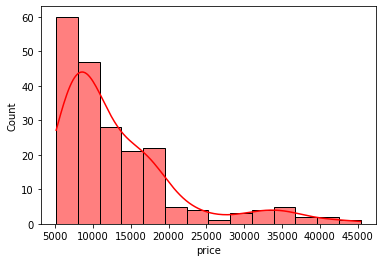

In [103]:
sns.histplot(df['price'],color = "red",kde = True)

## creating Linear Regression object

In [14]:
reg = linear_model.LinearRegression()

# Fitting the data into model

In [85]:
reg.fit(df[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']],df['price'])

LinearRegression()

# predicting the values

In [87]:
reg.predict(df[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio','stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']])

array([12930.05716312, 12930.05716312, 17978.75467205, 11613.80059892,
       15855.81180186, 15277.924566  , 18193.42956469, 18400.73799509,
       18646.79683378, 17733.59716772, 13002.15960477, 13002.15960477,
       16606.41287823, 16710.06709343, 17385.63010493, 27063.84151951,
       27071.30528459, 29656.62611368,  -880.60104102,  5981.27739982,
        5772.6811323 ,  5389.66797926,  6700.3476084 ,  8699.10104905,
        6839.21219064,  6880.67387672,  6880.67387672,  8785.19621264,
       11820.98579644, 14946.86172097,  2091.84092412,  8098.30229772,
        5498.73243138,  8539.02340944,  8569.17736295,  8055.66911394,
        9238.00921994, 10391.6988677 , 10491.58383871,  9902.46331031,
        8665.57421245, 10614.96964431, 10360.44320355,  6721.17037065,
        5981.27739982,  6047.23917313, 10746.08343577, 31078.46213484,
       31078.46213484, 46789.27705778,  5117.20796781,  6235.45412276,
        6244.87723323,  5591.26318103,  5550.55802035,  8366.62813992,
      

# Checking accuracy of model

In [88]:
r2 = r2_score(df['price'],reg.predict(df[['wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
                                          'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg']]))

In [90]:
accuracy = round(r2*100)
accuracy

85

# Dumping model into a file

In [91]:
import pickle

In [24]:
with open('car price prediction model','wb') as f:
    pickle.dump(reg,f)